This is a web scraping assignment that is done on Krisha.kz. 
I scraped the flats where the city is Taraz. 
The flats that I scraped were put up for sale.
My final dataframe is consist of 2864 rows and 11 columns. 
I got all the flats from Taraz.

In [78]:
# importing libraries
import selenium
from selenium import webdriver
import pandas as pd
import requests

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
driver = webdriver.Chrome()

In [5]:
# doing scraping for one page
url = 'https://krisha.kz/a/show/664501426'
driver.get(url)

name = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[1]/h1').text
location = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[1]/div[3]/span').text
description = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[2]/div[3]').text

try: 
    author = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[2]/div/div[2]/div[2]/a[2]').text
except:
    author = 'No Data'
    
price = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[1]/div').text
price = str(price)
price = re.sub("[^0-9]", "", price)

# scraping the mobile number
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}
r = requests.get(url, headers = headers)
soup = BeautifulSoup(r.content, 'lxml')
soup = str(soup)
phone = re.findall(r'phones(.+?)hasPhoto', soup)
phone = str(phone)
phone = re.sub("[^0-9]", "", phone)

print(name, location, description, price, author, phone)

3-комнатная квартира, 67 м², 2/5 этаж, Алатау 18 — Сейфуллина Тараз, Жамбылская обл. 1982 г.п. 16000000 No Data 77053192432


In [24]:
# getting links for each flat in Taraz
flatlinks = []
for x in range(1, 146):   
    r = requests.get(f'https://krisha.kz/prodazha/kvartiry/taraz/?page={x}')
    soup = BeautifulSoup(r.content, 'lxml')
    rawlinks = soup.find_all("div", { "class" : "a-card__header-left" })
    links = []
    for rawlink in rawlinks:
        rawlink=str(rawlink)
        rawlink = re.findall(r'a-card__title" href="(.+?)" target', rawlink)
        rawlink=str(rawlink)
        rawlink = rawlink.replace('[', '')
        rawlink = rawlink.replace(']', '')
        rawlink = rawlink.replace("'", '')
        flatlinks.append('https://krisha.kz' + rawlink)
        flatlinks = [ x for x in flatlinks if len(x) > 18 ]
print(flatlinks)

['https://krisha.kz/a/show/664466039', 'https://krisha.kz/a/show/664557141', 'https://krisha.kz/a/show/664434907', 'https://krisha.kz/a/show/54645261', 'https://krisha.kz/a/show/663858990', 'https://krisha.kz/a/show/663928887', 'https://krisha.kz/a/show/664190858', 'https://krisha.kz/a/show/662026332', 'https://krisha.kz/a/show/57079149', 'https://krisha.kz/a/show/663884741', 'https://krisha.kz/a/show/30402040', 'https://krisha.kz/a/show/664393303', 'https://krisha.kz/a/show/664521692', 'https://krisha.kz/a/show/664115891', 'https://krisha.kz/a/show/664489647', 'https://krisha.kz/a/show/55332906', 'https://krisha.kz/a/show/664623322', 'https://krisha.kz/a/show/53325921', 'https://krisha.kz/a/show/661262459', 'https://krisha.kz/a/show/664340010', 'https://krisha.kz/a/show/661654049', 'https://krisha.kz/a/show/664220650', 'https://krisha.kz/a/show/662362842', 'https://krisha.kz/a/show/664557807', 'https://krisha.kz/a/show/662790997', 'https://krisha.kz/a/show/660310019', 'https://krisha.

In [25]:
print('Total flat number: ' + str(len(flatlinks)))

Total flat number: 2881


In [26]:
# implementing final scraping 
final = []
for flat in flatlinks:
    driver.get(flat)
    try:
        name = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[1]/h1').text
    except:
        name = 'No Data'
    
    try:
        location = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[1]/div[3]/span').text
    except:
        location = 'No Data'
        
    try:
        description = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[2]/div[3]').text
    except:
        description = 'No Data'
        
    try: 
        author = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[2]/div/div[2]/div[2]/a[2]').text
    except:
        author = 'No Data'
    
    try:
        price = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[1]/div').text
        price = str(price)
        price = re.sub("[^0-9]", "", price)
    except:
        price = 'No Data'
    
    try:
        condition = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[5]/div[3]').text
    except:
        condition = 'No Data'
    
    try:
        bathroom = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[6]/div[3]').text
    except:
        bathroom = 'No Data'
        
    try:
        balcony = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[7]/div[3]').text
    except:
        balcony = 'No Data'  
    
    try:
        floor = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[3]/div[3]').text
    except:
        floor = 'No Data'
        
    try:    
    # scraping the mobile number
        headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}
        r = requests.get(flat, headers = headers)
        soup = BeautifulSoup(r.content, 'lxml')
        soup = str(soup)
        phone = re.findall(r'phones(.+?)hasPhoto', soup)
        phone = str(phone)
        phone = re.sub("[^0-9]", "", phone)
        phone = phone[0:11]
    except:
        phone = 'No Data'
    
    try:
        area = driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div[1]/div[1]/div[2]/div[4]/div[3]').text
    except:
        area = 'No Data'
        
    dictionary = {
        'Name' : name,
        'Location' : location,
        'Floor' : floor,
        'Building method' : description,
        'Area' : area,
        'Condition' : condition,
        'Bathroom' : bathroom,
        'Balcony' : balcony,
        'Price' : price,
        'Author' : author,
        'Phone' : phone
    }
    final.append(dictionary)
    

In [67]:
# exporting our list to the dataframe
df = pd.DataFrame(final)

In [70]:
df.loc[df['Price'] == 'No Data', 'Price'] = 0

In [71]:
# changing Price column's data type to the integer
df['Price'] = df.Price.astype(int)

In [72]:
count = df.loc[df['Price'] == 0]
count

,Name,Location,Floor,Building method,Area,Condition,Bathroom,Balcony,Price,Author,Phone
2860,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0,No Data,


In [73]:
# droping that row with null values
df.drop(df[df['Price'] == 0].index, inplace = True)

In [74]:
# exporting our dataframe to excel files
df.to_excel(r'C:\Users\Ali Shalbayev\Desktop\Ali_Shalbayev_BDA1902_HW5\Full_Taraz.xlsx', index = False)

In [75]:
df.to_csv(r'C:\Users\Ali Shalbayev\Desktop\Ali_Shalbayev_BDA1902_HW5\Full_Taraz.csv', index = False)

In [92]:
# showing the dataframe
df

,Name,Location,Floor,Building method,Area,Condition,Bathroom,Balcony,Price,Author,Phone
0,"3-комнатная квартира, 62 м², 5/5 этаж, Каратау...","Тараз, Жамбылская обл.",5 из 5,"панельный, 1968 г.п.","62 м², жилая — 62 м², кухня — 8 м²",среднее,раздельный,балкон,12500000,No Data,77056170524
1,"2-комнатная квартира, 46 м², 1/5 этаж, Желтокс...","Тараз, Жамбылская обл.",1 из 5,"кирпичный, 1969 г.п.","46 м², жилая — 35 м², кухня — 5 м²",евроремонт,совмещенный,металлическая,9000000,No Data,77766071954
2,"2-комнатная квартира, 54 м², 2/5 этаж, Байзак ...","Тараз, Жамбылская обл.",2 из 5,"кирпичный, 1981 г.п.",54 м²,евроремонт,раздельный,балкон,13500000,No Data,77003333944
3,"4-комнатная квартира, 100 м², 1/4 этаж, Желток...","Тараз, Жамбылская обл.",1 из 4,"кирпичный, 1968 г.п.","100 м², жилая — 82 м², кухня — 7 м²",евроремонт,раздельный,металлическая,20000000,No Data,77075847080
4,"3-комнатная квартира, 57 м², 3/4 этаж, улица К...","Тараз, Жамбылская обл.",3 из 4,"кирпичный, 1969 г.п.",57 м²,евроремонт,совмещенный,балкон,15900000,No Data,77474747994
...,...,...,...,...,...,...,...,...,...,...,...
2876,"2-комнатная квартира, 47 м², 2/5 этаж, 10микро...","Тараз, Жамбылская обл.",2 из 5,"панельный, 1986 г.п.",47 м²,хорошее,раздельный,лоджия,11700000,No Data,77478696889
2877,"3-комнатная квартира, 65 м², 4/5 этаж, Абая 132","Тараз, Жамбылская обл.",4 из 5,"панельный, 1978 г.п.","65 м², жилая — 62 м², кухня — 8 м²",хорошее,раздельный,балкон,15500000,No Data,77073472976
2878,"3-комнатная квартира, 56 м², 4/5 этаж, Толе би 91","Тараз, Жамбылская обл.",4 из 5,"кирпичный, 1985 г.п.","56 м², жилая — 36 м², кухня — 10 м²",среднее,нет,No Data,11171000,No Data,77768595979
2879,"2-комнатная квартира, 44.3 м², 1/5 этаж, Мкр. 9","Тараз, Жамбылская обл.",1 из 5,"панельный, 1979 г.п.",44.3 м²,хорошее,совмещенный,металлическая,8300000,No Data,77718359671


#### Summary statistics

In [82]:
from millify import millify

In [91]:
# showing the mean for the price in human readable format
millify(df['Price'].mean())

'14M'

In [85]:
# the same mean without using millify() function
df['Price'].mean()

13580336.688541668

In [89]:
# median for the price column
millify(df['Price'].median())

'13M'

In [90]:
# same thing
df['Price'].median()

12700000.0

In [97]:
# aggregating statistics
df['Price'].describe()

count    2.880000e+03
mean     1.358034e+07
std      6.905754e+06
min      1.500000e+06
25%      9.500000e+06
50%      1.270000e+07
75%      1.600000e+07
max      1.150000e+08
Name: Price, dtype: float64

In [ ]:
df['Floor'] = df['Floor'].astype(str).str[0]

In [219]:
df[['Floor', 'Price']].groupby('Floor').mean().sort_values(by = ['Price'], ascending = False)

,Price
Floor,
7,2.265385e+07
6,2.081739e+07
9,1.677273e+07
2,1.493332e+07
8,1.468462e+07
3,1.432984e+07
1,1.327462e+07
4,1.324855e+07
5,1.218574e+07


In [220]:
df[['Building method', 'Price']].groupby('Building method').mean().sort_values(by = ['Price'], ascending = False).head(10)

,Price
Building method,
"монолитный, 2010 г.п.",4.733333e+07
"кирпичный, 2020 г.п.",4.250000e+07
"кирпичный, 2021 г.п.",3.500000e+07
"кирпичный, 2019 г.п.",3.417500e+07
"кирпичный, 2018 г.п.",3.300000e+07
"кирпичный, 2007 г.п.",3.057941e+07
1994 г.п.,2.966667e+07
"монолитный, 2007 г.п.",2.850000e+07
"кирпичный, 2014 г.п.",2.832500e+07


In [221]:
floors[['Building method', 'Price']].groupby('Building method').mean().sort_values(by = 'Price', ascending = False).tail(10)

,Price
Building method,
"кирпичный, 1957 г.п.",8400000.0
"монолитный, 1967 г.п.",8250000.0
"панельный, 2007 г.п.",8000000.0
"панельный, 2015 г.п.",8000000.0
"иное, 1960 г.п.",7500000.0
"иное, 2017 г.п.",7000000.0
"кирпичный, 1954 г.п.",7000000.0
2006 г.п.,5500000.0
1958 г.п.,5500000.0


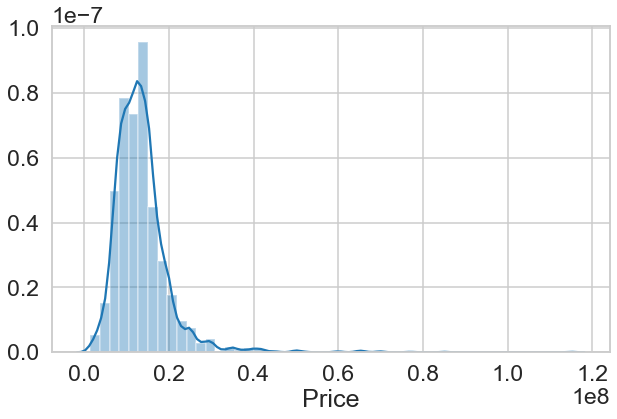

In [159]:
# distplot on prices
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

sns.set_context('talk', font_scale = 1.4)
sns.distplot(df['Price'], bins = 50, mean)

In [161]:
df['Price'].mean()

13580785.496857543

In [162]:
df.shape

(2864, 11)

#### Conclusion

On doing the summary statistics we saw that the mean price for a flat in Taraz is quite low. 

That definitely should be lower than most of the big cities in the country. 
We could see that median and mean are close to each other. Which says that our distribution is symmetrical.

The next that I tried to consider is the relationship between the floor number and the price. I assumed that the lower is floor the higher price will be. After implementing groupby function we see that 7th, 6th floors were on top which shocked me. Here my hypothesis failed to be justified.

Then I tried to look for the correlation between price and building type where we can see the year of building and some building materials. After groupby method, I see that houses that were built since 2000s were the most expensive, which was obvious actually. 
